In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend
from pythonds.basic.stack import Stack
from math import *
from sklearn.neighbors import KDTree
from lrg_plot_functions import *
from lrg_sum_functions import *
from cosmo_Calc import *
from divideByTwo import *
from read_data import *
from nearNeighbors import *
from scipy import stats
from astropy import stats
import healpy as hp
from localBKG_and_interlopersHEALPix import *
# import healpy as hpy
from makeCutoutTableFunc import *
from plotHistogramProjections3D import *
from read_bricks import *
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random
from sigSats import *
from sigSats_usingSumsat import *
from confidence_interval import *


In [2]:
# read in Nsat data divvied up into diferent redshift bins


data_Nsat25 = np.load('/Users/mtownsend/Documents/LRG_Data/data_Nsat25_unmasked.npz')
Nsat25 = data_Nsat25['Nsat25']
print(Nsat25.shape)

print('----')

data_Nsat03 = np.load('/Users/mtownsend/Documents/LRG_Data/data_Nsat03_unmasked.npz')
Nsat03 = data_Nsat03['Nsat03']
print(Nsat03.shape)

print('----')

data_Nsat35 = np.load('/Users/mtownsend/Documents/LRG_Data/data_Nsat35_unmasked.npz')
Nsat35 = data_Nsat35['Nsat35']
print(Nsat35.shape)

print('----')

data_Nsat04 = np.load('/Users/mtownsend/Documents/LRG_Data/data_Nsat04_unmasked.npz')
Nsat04 = data_Nsat04['Nsat04']
print(Nsat04.shape)

print('----')

data_Nsat45 = np.load('/Users/mtownsend/Documents/LRG_Data/data_Nsat45_unmasked.npz')
Nsat45 = data_Nsat45['Nsat45']
print(Nsat45.shape)

print('----')

data_Nsat05 = np.load('/Users/mtownsend/Documents/LRG_Data/data_Nsat05_unmasked.npz')
Nsat05 = data_Nsat05['Nsat05']
print(Nsat05.shape)

print('----')

data_Nsat55 = np.load('/Users/mtownsend/Documents/LRG_Data/data_Nsat55_unmasked.npz')
Nsat55 = data_Nsat55['Nsat55']
print(Nsat55.shape)

print('----')

data_Nsat06 = np.load('/Users/mtownsend/Documents/LRG_Data/data_Nsat06_unmasked.npz')
Nsat06 = data_Nsat06['Nsat06']
print(Nsat06.shape)

print('----')

data_Nsat65 = np.load('/Users/mtownsend/Documents/LRG_Data/data_Nsat65_unmasked.npz')
Nsat65 = data_Nsat65['Nsat65']
print(Nsat65.shape)

print('----')

zinit = 0.2
zfin = 0.65
interval = 0.05
# num = (zfin-zinit)/interval
num = 10. 
zrange, step = np.linspace(zinit, zfin, num=int(num), retstep=True)
print(zrange)

(90, 49, 49, 49)
----
(83, 49, 49, 49)
----
(136, 49, 49, 49)
----
(128, 49, 49, 49)
----
(180, 49, 49, 49)
----
(309, 49, 49, 49)
----
(386, 49, 49, 49)
----
(325, 49, 49, 49)
----
(186, 49, 49, 49)
----
[0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65]


In [3]:
# read in selection matrices for each luminosity selected sample 

data_smatrix03 = np.load('/Users/mtownsend/Desktop/lowz_smatrix-2matrices.npz')
smatrix03 = data_smatrix03['smatrix_low']
print(smatrix03.shape)

data_smatrix04 = np.load('/Users/mtownsend/Desktop/midz1_smatrix-4matrices.npz')
smatrix04 = data_smatrix04['smatrix_low']
print(smatrix04.shape)

data_smatrix05 = np.load('/Users/mtownsend/Desktop/midz2_smatrix-6matrices.npz')
smatrix05 = data_smatrix05['smatrix_low']
print(smatrix05.shape)

data_smatrix06 = np.load('/Users/mtownsend/Desktop/midz3_smatrix-8matrices.npz')
smatrix06 = data_smatrix06['smatrix_low']
print(smatrix06.shape)

data_smatrix65 = np.load('/Users/mtownsend/Desktop/highz_smatrix-9matrices.npz')
smatrix65 = data_smatrix65['smatrix_low']
print(smatrix65.shape)



(2, 49, 49, 49)
(4, 49, 49, 49)
(6, 49, 49, 49)
(8, 49, 49, 49)
(9, 49, 49, 49)


In [4]:
# read in files with the number of satellites for 80, 90, and 99 percentiles for each LRG redshift/luminosity bin

percentiles_lowz = np.load('/Users/mtownsend/Desktop/MeetingPlots/2Oct2020/percentiles_lowz.npz')
p25_low = percentiles_lowz['p25_low']
p30_low = percentiles_lowz['p30_low']

percentiles_mid1 = np.load('/Users/mtownsend/Desktop/MeetingPlots/2Oct2020/percentiles_mid1.npz')
p25_mid1 = percentiles_mid1['p25_mid1']
p30_mid1 = percentiles_mid1['p30_mid1']
p35_mid1 = percentiles_mid1['p35_mid1']
p40_mid1 = percentiles_mid1['p40_mid1']

percentiles_mid2 = np.load('/Users/mtownsend/Desktop/MeetingPlots/2Oct2020/percentiles_mid2.npz')
p25_mid2 = percentiles_mid2['p25_mid2']
p30_mid2 = percentiles_mid2['p30_mid2']
p35_mid2 = percentiles_mid2['p35_mid2']
p40_mid2 = percentiles_mid2['p40_mid2']
p45_mid2 = percentiles_mid2['p45_mid2']
p50_mid2 = percentiles_mid2['p50_mid2']

percentiles_mid3 = np.load('/Users/mtownsend/Desktop/MeetingPlots/2Oct2020/percentiles_mid3.npz')
p25_mid3 = percentiles_mid3['p25_mid3']
p30_mid3 = percentiles_mid3['p30_mid3']
p35_mid3 = percentiles_mid3['p35_mid3']
p40_mid3 = percentiles_mid3['p40_mid3']
p45_mid3 = percentiles_mid3['p45_mid3']
p50_mid3 = percentiles_mid3['p50_mid3']
p55_mid3 = percentiles_mid3['p55_mid3']
p60_mid3 = percentiles_mid3['p60_mid3']

percentiles_highz = np.load('/Users/mtownsend/Desktop/MeetingPlots/2Oct2020/percentiles_high.npz')
p25_high = percentiles_highz['p25_high']
p30_high = percentiles_highz['p30_high']
p35_high = percentiles_highz['p35_high']
p40_high = percentiles_highz['p40_high']
p45_high = percentiles_highz['p45_high']
p50_high = percentiles_highz['p50_high']
p55_high = percentiles_highz['p55_high']
p60_high = percentiles_highz['p60_high']
p65_high = percentiles_highz['p65_high']


In [5]:
# def totalNsat(Nsat, lum, z1, z2):
# def totalNsat(sumsat, lum, z1, z2):
def totalNsat(sumsat, lum, z1, z2, ci_l, ci_u):

    import matplotlib.pylab as plt 	
    import numpy as np
    from scipy import stats
    
    left, width = .25, .5
    bottom, height = .25, .5
    right = left + width
    top = bottom + height


#     sumsat = []

#     # Sum up number of satellite galaxies for every LRG
#     for i in range(len(Nsat)):
#         sumsat.append(np.sum(Nsat[i]))

    meansat = np.mean(sumsat)
#     print("mean number of satellites is", meansat)
    
    mediansat = np.median(sumsat)
#     print("median number of satellites is", mediansat)

    sdsat = np.std(sumsat)
#     print("standard deviation of satellites is", sdsat)

    sterr = stats.sem(sumsat)
#     print("standard error is", sterr)

    plt.rcParams["figure.figsize"] = [15, 8]
    fig = plt.figure()
    ax = fig.add_subplot(111)
#     plt.title("Histogram of the Number of Satellite Galaxies; log(lum)=10.36; 0.55 < z < 0.6", fontsize=25)
#     plt.title("Histogram of the Number of Satellite Galaxies; log(lum)={}; {} < z < {}".format(lum, z1, z2), fontsize=20)
    plt.title("Number of LRGs with Significant Satellite Detections (bootstrap); log(lum)={}; {} < z < {}".format(lum, z1, z2), fontsize=16)
    plt.hist(sumsat, bins=50)
#     plt.axvline(linewidth=1, color='r')
#     plt.xlabel(r'$Number$ $of$ $Satellite$ $Galaxies$', fontsize=25)
    plt.xlabel(r'$Number$ $of$ $LRGs$ $with$ $Significant$ $Satellite$ $Detections$', fontsize=16)
    plt.ylabel(r'$counts$', fontsize=25)
    plt.axvline(x=ci_l, linewidth=1, ls='-', color='r')
    plt.axvline(x=ci_u, linewidth=1, ls='-', color='r')
    plt.text(top, right,'mean = {}'.format(meansat), fontsize=14, ha='center', va='center', transform=ax.transAxes)
#     plt.text(top, right-0.05,'median = {}'.format(mediansat), fontsize=14, ha='center', va='center', transform=ax.transAxes)
    plt.text(top, right-0.1,'stdev = {}'.format(sdsat), fontsize=14, ha='center', va='center', transform=ax.transAxes)
    # plt.show()
#     return(sumsat)


In [6]:
# make masked Nsat for log(lum)=9.55; 0.2 < z < 0.3

# 0.2 < z < 0.25
lowz_newNsat25 = []
for i in range(len(Nsat25)):
    lowz_newNsat25.append(Nsat25[i] * smatrix03[0])
    
# 0.25 < z < 0.3
lowz_newNsat03 = []
for i in range(len(Nsat03)):
    lowz_newNsat03.append(Nsat03[i] * smatrix03[1])

print(np.asarray(lowz_newNsat25).shape)
print(np.asarray(lowz_newNsat03).shape)

(90, 49, 49, 49)
(83, 49, 49, 49)


In [13]:
# # bootstrap with resampling from masked Nsat

# from astropy.stats import bootstrap

# # sumsat_lowz25, sats_lowz25, nosats_lowz25 = sigSats(lowz_newNsat25, p25_low[2])

# sumsat = []
# # Sum up number of satellite galaxies for every LRG
# for i in range(len(lowz_newNsat25)):
#     sumsat.append(np.sum(lowz_newNsat25[i]))

# print(len(sumsat))
# # print(len(sats_lowz25))
# # print(len(nosats_lowz25))

# # sumsat is an array of the number of satellites around each LRG. array is length of number of LRGs.
# # result of bootstrap should be bootnum number of resampling with replacement
# # low_bootstrap25 = bootstrap(np.array(lowz_newNsat25), bootnum=5000)
# low_bootstrap25 = bootstrap(np.array(sumsat), bootnum=5000)
# print(low_bootstrap25.shape)

# print("first")

90
(5000, 90)
first


90
first
second
third
fourth
lower confidence limit:  4.024223216653597
upper confidence limit:  9.238443450013069
fifth


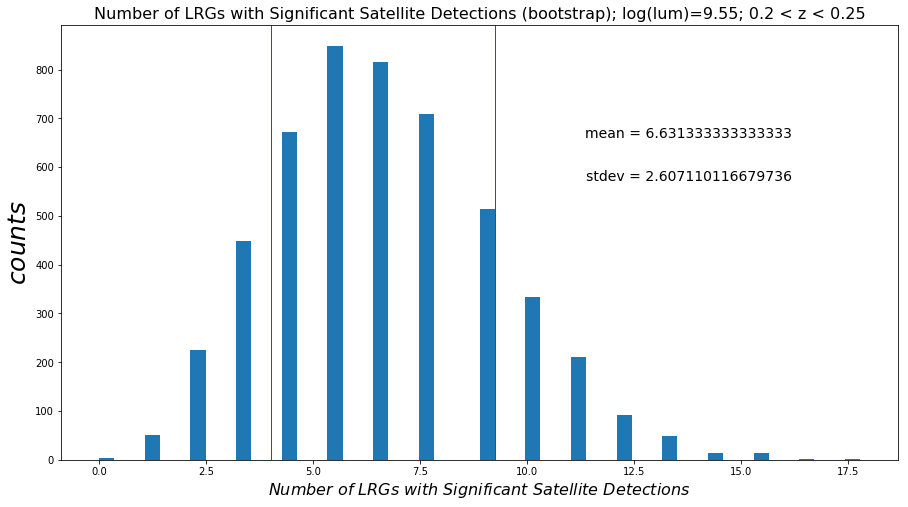

In [10]:
# bootstrap with resampling from masked Nsat25

from astropy.stats import bootstrap

low_sumsat25 = []
# Sum up number of satellite galaxies for every LRG
for i in range(len(lowz_newNsat25)):
    low_sumsat25.append(np.sum(lowz_newNsat25[i]))

print(len(low_sumsat25))
# print(len(sats_lowz25))
# print(len(nosats_lowz25))

# sumsat is an array of the number of satellites around each LRG. array is length of number of LRGs.
# result of bootstrap should be bootnum number of resampling with replacement
low_bootstrap25 = bootstrap(np.array(low_sumsat25), bootnum=5000)
# print(low_bootstrap25.shape)
# print(low_bootstrap25[4])

print("first")

# next, determine how many of these are above the 99 percent threshold
# this gives an array of indices of LRGs with sats and without sats
low_sats25 = []
low_nosats25 = []
# low_sumsats25 = []
for i in range(len(low_bootstrap25)):
    sats_list, nosats_list = sigSats_usingSumsat(low_bootstrap25[i], p25_low[2])
    low_sats25.append(sats_list)
    low_nosats25.append(nosats_list)
    
# print(np.asarray(low_sats25[4]))
# print('----')
# print(len(np.asarray(low_nosats25)))

print("second")


# calculate percentage of LRGs have a significant satellite population
low_percent25 = []
for i in range(len(low_sats25)):
    temp = (len(low_sats25[i])/len(low_sumsat25))*100.
    low_percent25.append(temp)

# print(low_percent25)

print("third")

# # next, use the length of each sats array to find out how many LRGs in the sample have
# # a significant satellite population
# low_num_with_sats25 = []
# for i in range(len(low_sats25)):
#     low_num_with_sats25.append(len(low_sats25[i]))
                               
# print(low_num_with_sats25)

# print("fourth")

# calculate 68 percent confidece interval
low_ci_l_25, low_ci_u_25 = confidence_interval(low_percent25)
print('lower confidence limit: ', low_ci_l_25)
print('upper confidence limit: ', low_ci_u_25)

print("fourth")

totalNsat(low_percent25, 9.55, round(zrange[0], 2), round(zrange[1], 2), low_ci_l_25, low_ci_u_25)

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/2Oct2020/lowz_LRG_with_sats25.pdf')
plt.show()


83
first
second
third
lower confidence limit:  0.0
upper confidence limit:  0.0
fourth


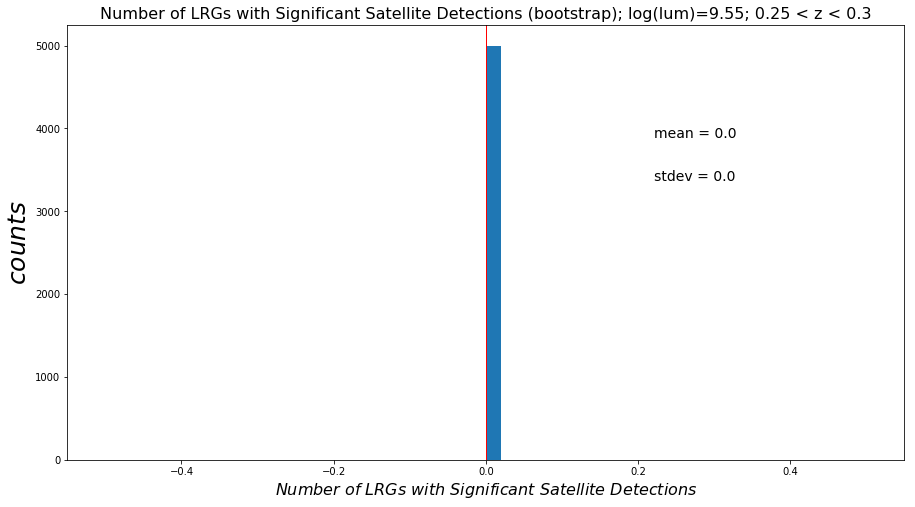

In [13]:
# bootstrap with resampling from masked Nsat03

from astropy.stats import bootstrap

low_sumsat03 = []
# Sum up number of satellite galaxies for every LRG
for i in range(len(lowz_newNsat03)):
    low_sumsat03.append(np.sum(lowz_newNsat03[i]))

print(len(low_sumsat03))
# print(len(sats_lowz25))
# print(len(nosats_lowz25))

# sumsat is an array of the number of satellites around each LRG. array is length of number of LRGs.
# result of bootstrap should be bootnum number of resampling with replacement
low_bootstrap03 = bootstrap(np.array(low_sumsat03), bootnum=5000)
# print(low_bootstrap25.shape)
# print(low_bootstrap25[4])

print("first")

# next, determine how many of these are above the 99 percent threshold
# this gives an array of indices of LRGs with sats and without sats
low_sats03 = []
low_nosats03 = []
for i in range(len(low_bootstrap03)):
    sats_list, nosats_list = sigSats_usingSumsat(low_bootstrap03[i], p30_low[2])
    low_sats03.append(sats_list)
    low_nosats03.append(nosats_list)
    
# print(np.asarray(low_sats25[4]))
# print('----')
# print(len(np.asarray(low_nosats25)))

print("second")


# calculate percentage of LRGs have a significant satellite population
low_percent03 = []
for i in range(len(low_sats03)):
    temp = (len(low_sats03[i])/len(low_sumsat03))*100.
    low_percent03.append(temp)

# print(low_percent25)

print("third")

# # next, use the length of each sats array to find out how many LRGs in the sample have
# # a significant satellite population
# low_num_with_sats25 = []
# for i in range(len(low_sats25)):
#     low_num_with_sats25.append(len(low_sats25[i]))
                               
# print(low_num_with_sats25)

# print("fourth")

# calculate 68 percent confidece interval
low_ci_l_03, low_ci_u_03 = confidence_interval(low_percent03)
print('lower confidence limit: ', low_ci_l_03)
print('upper confidence limit: ', low_ci_u_03)

print("fourth")

totalNsat(low_percent03, 9.55, round(zrange[1], 2), round(zrange[2], 2), low_ci_l_03, low_ci_u_03)

# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/2Oct2020/lowz_LRG_with_sats25.pdf')
plt.show()
